In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
#import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
#data = pd.read_csv('Nipro16032019.csv', parse_dates=['LastUpdateTimeStamp'], index_col='LastUpdateTimeStamp',date_parser=dateparse)
#data.index
data=pd.read_csv('Nipro16032019.csv')

In [3]:
#print(data.head()['Temp'])
#print (data.dtypes)
new_dict = {}

In [4]:
numb = []
#print(data.groupby('PatientNumber').PatientNumber.nunique())
#print((data.groupby('PatientNumber')) )

#print(data['PatientNumber'].unique())
data['PatientNumber'] = data['PatientNumber'].astype('str')
#print(data['PatientNumber'].unique())


for number, group in data.groupby('PatientNumber'): 
    
#     print(number)
    #print('string number :%s:' %(number))
    numb.append(number)
    if len(group)>=2000:
        print('number: %s   group size : %d' %(number, len(group)))
    #print('###############################')
    new_dict[number] = group

number: 12550   group size : 2300
number: 12972   group size : 3810
number: 13302   group size : 3811
number: 16897   group size : 2299
number: 18762   group size : 3573
number: 20131   group size : 3811
number: 22784   group size : 2299
number: 23857   group size : 3811
number: 24233   group size : 4486
number: 25478   group size : 3811
number: 27271   group size : 3811
number: 31431   group size : 3810
number: 32922   group size : 3810
number: 36770   group size : 3553
number: 39491   group size : 3811
number: 40806   group size : 4946
number: 41161   group size : 3811
number: 41295   group size : 5057
number: 41684   group size : 4364
number: 8436   group size : 2299
number: 9775   group size : 5029


In [5]:
df2=data.sort_values(by='LastUpdateTimeStamp',ascending=True)

In [6]:
to_drop=['ID', 'DialysisScheduleId', 'FirstName', 'MiddleName',
       'LastName', 'BillNo', 'DialysisDataId', 'Status',
       'TreatmentType', 'Bypass', 'Dflow','BpFlow','WBCond',"TBVol",'DIPPG2','DIPPG4','SNPress', 'RTime', 'PTime', 'TrTime', 'EstFTime',
        'THour',"AUFSpeed",'PUFRem','SPSpeed',
       'TUFSpeed', 'TUfGoal', 'TTime', 'BFAvg','TotCond',
       'AlarmCode', 'AlarmType', 'AddedDate', 'SerialNumber',
       'NiproMachineName']

In [7]:
data1=df2.drop(to_drop,axis=1)

In [8]:
Patient = data1.loc[data['PatientNumber'] == '41295']
Patient.index = range(5057)

In [9]:
Patient.head()


,PatientNumber,LastUpdateTimeStamp,DIPPG3,Apress,Vpress,BPSyst,BPDia,Hrate,IVSPump,Temp,TMP,BP,CKTV,TKTV
0,41295,2019-03-16 15:28:45,89,-147,85,142.0,66.0,75.0,9.6,36.4,-44.0,142/66,0.1,1.2
1,41295,2019-03-16 15:28:47,101,-147,80,142.0,66.0,75.0,9.6,36.4,-43.0,142/66,0.1,1.2
2,41295,2019-03-16 15:28:49,91,-147,88,142.0,66.0,75.0,9.6,36.4,-43.0,142/66,0.1,1.2
3,41295,2019-03-16 15:28:51,90,-147,86,142.0,66.0,75.0,9.6,36.4,-43.0,142/66,0.1,1.2
4,41295,2019-03-16 15:28:53,90,-147,89,142.0,66.0,75.0,9.6,36.4,-43.0,142/66,0.1,1.2


In [10]:
#Patient.loc[:,['']]

In [11]:
#Patient.loc[:,['BPSyst','Apress']].plot()

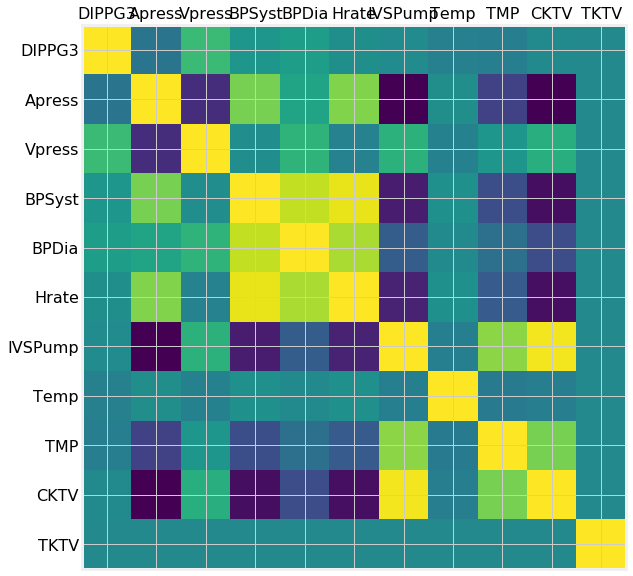

In [12]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(Patient)

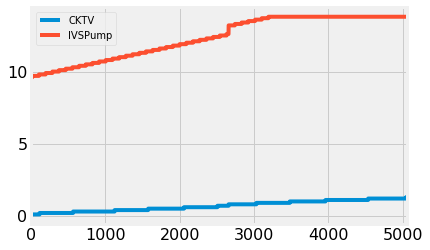

In [13]:
Patient.loc[:,['CKTV','IVSPump']].plot()

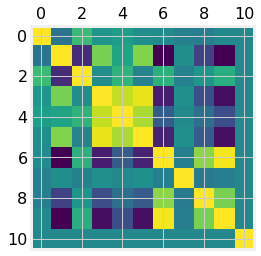

In [14]:
import matplotlib.pyplot as plt

plt.matshow(Patient.corr())
plt.show()

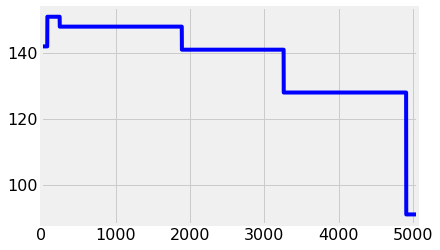

In [15]:
Patient.plot(kind='line',y='BPSyst',color='blue',legend=None)

In [16]:
training_set = Patient.iloc[:4000, 5:6].values

In [17]:
print(training_set)

[[142.]
 [142.]
 [142.]
 ...
 [128.]
 [128.]
 [128.]]


In [18]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [20]:
X_train = []
y_train = []
for i in range(60, 4000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
X_train.shape

(3940, 60)

In [22]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [23]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU

In [24]:
# Initialising the RNN
regressor = Sequential()

In [25]:
# Adding the input layer and the LSTM layer
regressor.add(GRU(units = 3, input_shape = (None, 1)))

In [26]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [27]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
# Fitting the RNN to the Training set
history=regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Train on 3940 samples
Epoch 1/10
3940/3940 [==============================] - 6s 2ms/sample - loss: 0.1611
Epoch 2/10
3940/3940 [==============================] - 4s 1ms/sample - loss: 0.0383
Epoch 3/10
3940/3940 [==============================] - 4s 1ms/sample - loss: 0.0239
Epoch 4/10
3940/3940 [==============================] - 5s 1ms/sample - loss: 0.0115
Epoch 5/10
3940/3940 [==============================] - 4s 1ms/sample - loss: 0.0036
Epoch 6/10
3940/3940 [==============================] - 4s 1ms/sample - loss: 7.0737e-04
Epoch 7/10
3940/3940 [==============================] - 4s 1ms/sample - loss: 2.4437e-04
Epoch 8/10
3940/3940 [==============================] - 4s 909us/sample - loss: 2.1141e-04
Epoch 9/10
3940/3940 [==============================] - 3s 868us/sample - loss: 2.0809e-04
Epoch 10/10
3940/3940 [==============================] - 4s 956us/sample - loss: 2.0513e-04


In [29]:
test_set1 = Patient.iloc[4000:, 5:6].values
#print(test_set1)

In [30]:
# Getting the real blood pressure 
dataset_test = test_set1
real_BPSyst = np.concatenate((training_set[0:4000], test_set1), axis = 0)

In [41]:
scaled_real_BPSyst = sc.fit_transform(real_BPSyst)
inputs = []
for i in range(4000, 5057):
    inputs.append(scaled_real_BPSyst[i-60:i, 0])
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
predicted_BPSyst = regressor.predict(inputs)
predicted_BPSyst = sc.inverse_transform(predicted_BPSyst)

In [42]:
predicted_BPSyst.shape

(1057, 1)

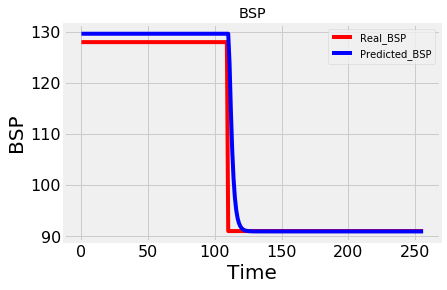

In [43]:
# Visualising the results
plt.plot(real_BPSyst[4800:], color = 'red', label = 'Real_BSP')
plt.plot(predicted_BPSyst[800:], color = 'blue', label = 'Predicted_BSP')
plt.title('BSP')
plt.xlabel('Time')
plt.ylabel('BSP')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

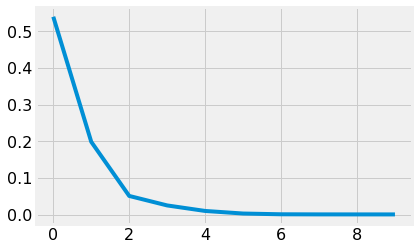

In [44]:
plt.plot(history.history["loss"])
plt.show

In [45]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [52]:
print("Test RMSE:%.3f" %sqrt(mean_squared_error(test_set1,predicted_BPSyst)))

Test RMSE:2.023


In [53]:
print(str(round(sqrt(mean_squared_error(test_set1[:,0], predicted_BPSyst))/test_set1.mean()*100,2))+"%")

1.65%
